In [1]:
from ClustersFeatures import *

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
pd_df=pd.DataFrame(digits.data)
pd_df['target'] = digits.target
pd_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [3]:
CC=ClustersCharacteristics(pd_df, "target")

In [4]:
CC.generate_output_by_info_type('general', 'max', 'G-Max-01')

908297.1736053203

In [39]:
import json
with open('./ClustersFeatures/indices.json') as f:
  data = json.load(f)

dict_result=data.copy()
for k in data:
    for j in data[k]:
        for z,l in enumerate(data[k][j].values()):
            dict_result[k][j][list(data[k][j].keys())[z]] =CC.generate_output_by_info_type(k, j, l)
            

In [42]:
pd.DataFrame(dict_result['general'])

,max,max diff,min,min diff
Between-group total dispersion,908297.173605,NaN,NaN,NaN
Mean quadratic error,696.026777,NaN,NaN,NaN
Silhouette Index,0.162943,NaN,NaN,NaN
Davies Bouldin Index,2.151710,NaN,2.15171,NaN
Dunn Index,0.258976,NaN,NaN,NaN
Wemmert-Gancarski Index,0.250224,NaN,NaN,NaN
Ratkowsky-Lance Index,NaN,NaN,NaN,NaN
Point Biserial Index,-4.064967,NaN,NaN,NaN
PBM Index,34.224177,NaN,NaN,NaN
Trace WiB Index,NaN,NaN,NaN,NaN


In [43]:
pd.DataFrame(dict_result['clusters'])

,max,min
Centroid distance to barycenter,"[26.422334274375757, 20.184062405495773, 22.95...",NaN
Between-group Dispersion,"[124268.87523421964, 74146.1402843885, 93295.1...",NaN
Average Silhouette,"[0.3608993843537291, 0.0522745950239847, 0.144...",NaN
KernelDensity mean,"[-87.26207798353086, -102.79627948741418, -118...",NaN
Ball Hall Index,"[396.35042923873254, 940.635943726603, 751.205...",NaN
Within-Cluster Dispersion,NaN,"[70550.3764044944, 171195.74175824175, 132963...."
Largest element distance,NaN,"[54.543560573178574, 72.85602240034794, 67.0, ..."
Inter-element mean distance,NaN,"[27.495251790928528, 41.577045912127325, 37.66..."
Davies Bouldin Index,NaN,"[1.5562835255687342, 2.7094878742321797, 2.094..."
C Index,NaN,"[0.15780619270180213, 0.46260452261163637, 0.3..."


In [33]:
CC.clusters_info

,0,1,2,3,4,5,6,7,8,9
Number of elements,178,182,177,183,181,182,181,179,174,180
Centroid distance to center,57.210071,56.762434,56.136866,55.674461,55.969959,54.635197,57.732027,54.951036,57.264578,54.649894
Centroid distance to barycenter,26.422334,20.184062,22.95847,21.715596,25.717241,20.283309,26.419951,24.426658,13.443062,19.876909
Between-group Dispersion,124268.875234,74146.140284,93295.172026,86296.777992,119709.139134,74877.094708,126340.504248,106802.430814,31444.567429,71116.471738
Average Silhouette,0.360899,0.052275,0.144076,0.150767,0.16517,0.119483,0.287638,0.193736,0.084882,0.071171
KernelDensity mean,-87.262078,-102.796279,-118.280743,-102.801933,-102.790944,-102.796453,-87.278791,-102.779832,-118.263652,-118.297555
Ball Hall Index,396.350429,940.635944,751.205975,633.627639,736.286316,757.38537,512.891548,734.746793,741.158872,753.722407
Within-Cluster Dispersion,70550.376404,171195.741758,132963.457627,115953.857923,133267.823204,137844.137363,92833.370166,131519.675978,128961.643678,135670.033333
Largest element distance,54.543561,72.856022,67.0,62.33779,71.693793,66.535705,61.155539,67.933791,61.171889,63.773035
Inter-element mean distance,27.495252,41.577046,37.665254,34.812725,37.285583,38.082887,31.222159,37.24123,37.93881,37.830621


In [6]:
from sklearn.datasets import make_blobs

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
X, y = make_blobs(n_samples=200, centers=4, n_features=7,cluster_std=[0.3,3,5,1])
X=StandardScaler().fit_transform(X)
T=pd.DataFrame(data=X)
T['target']=y
CC2=ClustersCharacteristics(T,"target")

In [7]:
CC2.data_interelement_distance_for_clusters(clusters=[1])

Distance  Same Cluster ?
6   8    2.638288            True
    14   1.936832            True
    20   1.255322            True
    29   0.936678            True
    33   2.254657            True
...           ...             ...
182 191  2.386774            True
    196  2.548207            True
186 191  2.263832            True
    196  2.076085            True
191 196  2.645244            True

[1225 rows x 2 columns]

In [8]:
S=CC2.clusters_info


In [9]:
S.loc[S.index[0]].std()

0.0

In [10]:
df=pd.DataFrame()
for index in S.index:
    if (S.loc[index]).std()==0:
        df[index]=len(S.T)*[1]
    else:
        df[index]=(S.loc[index]-S.loc[index].min())/(S.loc[index].max()-S.loc[index].min())

In [11]:
df

,Number of elements,Centroid distance to center,Centroid distance to barycenter,Between-group Dispersion,Average Silhouette,KernelDensity mean,Ball Hall Index,Within-Cluster Dispersion,Largest element distance,Inter-element mean distance,Davies Bouldin Index,C Index,Radius min,Radius mean,Radius median,Radius 75th Percentile,Radius max
0,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.211768,0.211768,0.185108,0.45149,0.220496,0.334674,0.334674,0.484757,0.559712,1.0,0.559712,0.682822,0.564479,0.560622,0.583333,0.409372
2,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1,0.492875,0.492875,0.452955,0.851678,0.667921,0.038856,0.038856,0.144242,0.153618,0.974069,0.153618,0.168329,0.154721,0.155725,0.154823,0.124926


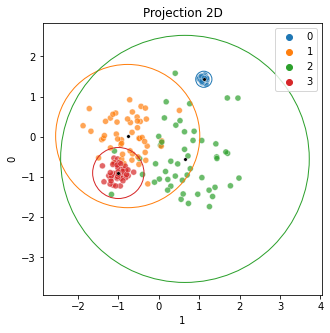

In [12]:
CC2.projection_2D(1,0)

In [13]:
MAT=CC2.clusters_info.to_numpy()


In [14]:
RE_max=pd.DataFrame(MAT.max(axis=1,keepdims=1) == MAT, index=CC2.clusters_info.index)
RE_min=pd.DataFrame(MAT.min(axis=1,keepdims=1) == MAT, index=CC2.clusters_info.index)
RE_max=RE_max[1:7]
RE_min=pd.concat([RE_min[8:12],RE_min[15:16]])
RE_min.sum() + RE_max.sum()

0    10
1     0
2     1
3     0
dtype: int64

In [15]:
 import json

In [16]:
data['radius']['min']

{'Radius min': 'R-Min-01',
 'Radius mean': 'R-Min-02',
 'Radius median': 'R-Min-03',
 'Radius 75th Percentile': 'R-Min-04',
 'Radius max': 'R-Min-05'}